In [1]:
import sys
sys.path.append('..')

from models import basic_dnn_regression
from develop.file_listing import *

from sklearn import metrics
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [2]:
ckpt_path = "./out/deeppain/"
basedir = '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study'

# Making Beta list

In [3]:
in_condition_1 = ['study01_bmrk3', 'study02_bmrk4', 'study03_nsf', 'study04_ie', 'study05_exp', 'study06_ilcp']
in_condition_2 = ['subject']
out_conidtion = ['nopain']

In [4]:
search_list = dir_search(basedir=basedir, in_condition_1=in_condition_1, 
                         in_condition_2 = in_condition_2, 
                         out_conidtion=out_conidtion)

In [5]:
beta_full_path_list = beta_file_list(search_list, 15)
beta_full_path_list[:10]

array(['/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0057.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0011.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0023.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0006.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0020.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0009.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0018.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0008.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/subject001/beta0021.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppai

In [6]:
beta_full_path_list.shape

(2745,)

# Making Rating list

In [7]:
in_condition_1 = ['study01_bmrk3', 'study02_bmrk4', 'study03_nsf', 'study04_ie', 'study05_exp', 'study06_ilcp']
in_condition_2 = ['rating_csv']
out_conidtion = ['nopain']

In [8]:
rating_full_path_list = rating_file_list(basedir, in_condition_1, 
                                    in_condition_2, out_conidtion=out_conidtion)
rating_full_path_list[:3]

array(['/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/rating_csv/study01_bmrk3_subject001_dat.csv',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/rating_csv/study01_bmrk3_subject002_dat.csv',
       '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study01_bmrk3/rating_csv/study01_bmrk3_subject003_dat.csv'],
      dtype='<U115')

In [9]:
y = []
for i in tqdm_notebook(range(len(beta_full_path_list))):
    beta_name = os.path.split(beta_full_path_list[i])[1]
    subject_number = os.path.split(os.path.split(beta_full_path_list[i])[0])[1]
    
    for j in range(len(rating_full_path_list)):
        if subject_number in rating_full_path_list[j]:
            pd_rating = pd.read_csv(rating_full_path_list[j])
            rating = pd_rating.loc[pd_rating['beta_index'] == beta_name, ['rating_standard_bt_study']].values[0][0]
            y.append(rating)

In [10]:
len(y)

2745

In [11]:
data_shape = np.load(beta_full_path_list[0]).flatten().shape
X = np.empty((len(beta_full_path_list),data_shape[0]))

for i in tqdm_notebook(range(len(beta_full_path_list))):
    temp_data = np.load(beta_full_path_list[i]).flatten()
    X[i] = temp_data

# PCA

In [12]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,510330,510331,510332,510333,510334,510335,510336,510337,510338,510339
0,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,...,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954
1,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,...,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954
2,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,...,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954
3,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,...,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954
4,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,...,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [14]:
df.shape

(2745, 510340)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

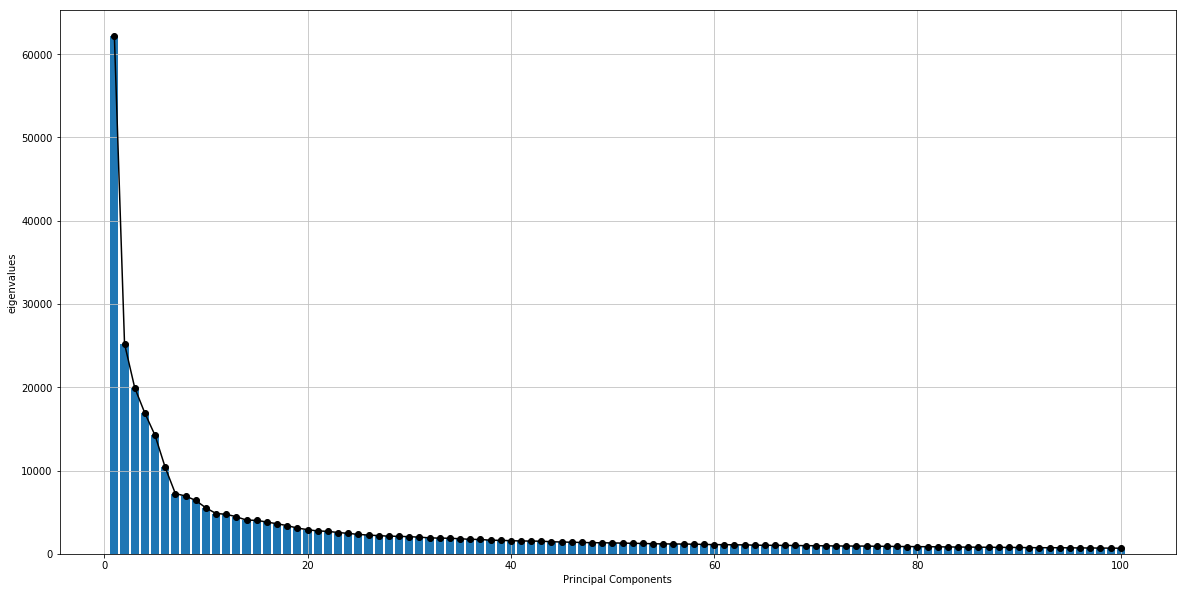

In [23]:
PC_numbers = 100

eigenvalues = pca.explained_variance_

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(range(1,PC_numbers+1),eigenvalues)
plt.plot(range(1,PC_numbers+1),eigenvalues,c='black', marker='o')
plt.grid(b=True, which='major',c='silver')
plt.xlabel('Principal Components')
plt.ylabel('eigenvalues')
plt.show()

In [35]:
x_pca = pca.transform(df)
x_pca.shape

(2745, 100)

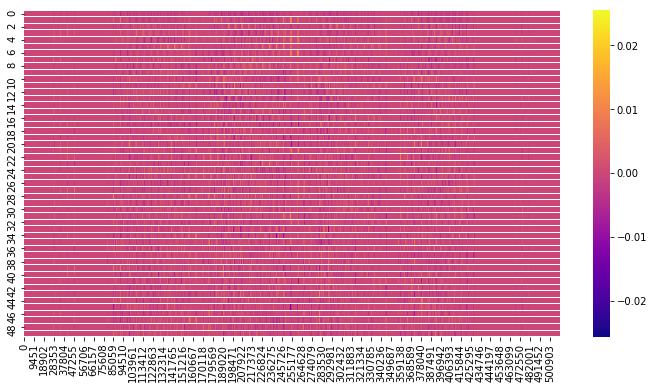

In [16]:
df_comp = pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')
plt.show()

# Linear Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

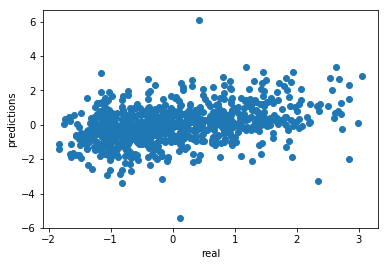

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('real')
plt.ylabel('predictions')
plt.show()

In [27]:
r2_score(y_test, predictions)

-0.357760751562785

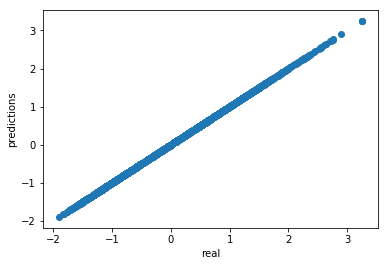

In [31]:
predictions2 = lm.predict(X_train)
plt.scatter(y_train,predictions2)
plt.xlabel('real')
plt.ylabel('predictions')
plt.show()

In [32]:
r2_score(y_train, predictions2)

1.0

# LASSO Linear Regression

In [21]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

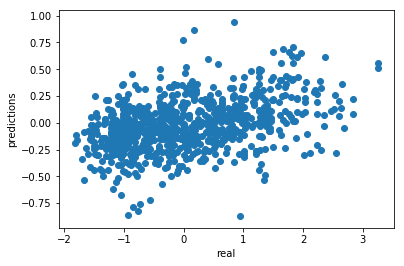

In [22]:
predictions = clf.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('real')
plt.ylabel('predictions')
plt.show()

In [23]:
r2_score(y_test, predictions)

0.13226609833266412

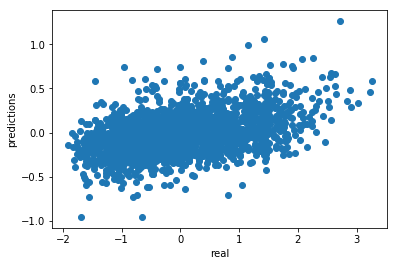

In [24]:
predictions2 = clf.predict(X_train)
plt.scatter(y_train,predictions2)
plt.xlabel('real')
plt.ylabel('predictions')
plt.show()

In [25]:
r2_score(y_train, predictions2)

0.16148883680374826

# PCA linear regression

In [36]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=101)

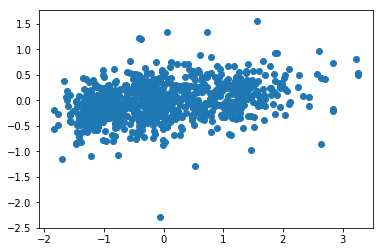

In [18]:
lm = LinearRegression()
lm.fit(X_pca_train, y_train)
predictions = lm.predict(X_pca_test)
plt.scatter(y_test, predictions)

In [19]:
r2_score(y_test, predictions)

0.09786425973250645

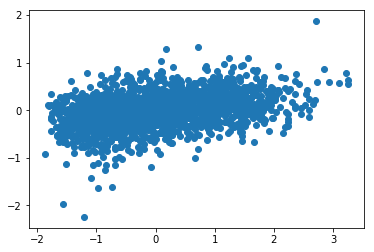

In [20]:
predictions2 = lm.predict(X_pca_train)
plt.scatter(y_train, predictions2)

In [21]:
r2_score(y_train, predictions2)

0.1338989953319094

# PCA LASSO linear regression

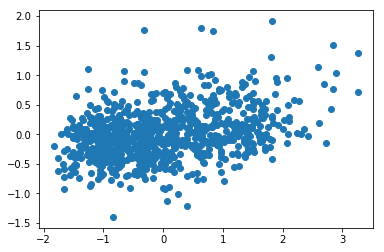

In [38]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_pca_train, y_train)
predictions = clf.predict(X_pca_test)
plt.scatter(y_test, predictions)

In [39]:
r2_score(y_test, predictions)

0.10999237130546902

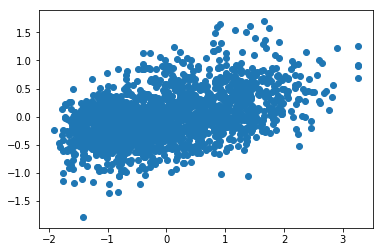

In [40]:
predictions2 = clf.predict(X_pca_train)
plt.scatter(y_train, predictions2)

In [41]:
r2_score(y_train, predictions2)

0.20054448143214898

# SVR linear

In [ ]:
svr_lin = SVR(kernel='linear', C=1e3, verbose=True)
svr_lin.fit(X_train,y_train)
svr_lin_prediction = svr_lin.predict(X_test)
plt.scatter(y_test, svr_lin_prediction)

[LibSVM]

In [ ]:
r2_score(y_test, svr_lin_prediction)

In [ ]:
svr_lin_prediction2 = svr_lin.predict(X_train)
plt.scatter(y_train, svr_lin_prediction2)

In [ ]:
r2_score(y_train, svr_lin_prediction2)

# PCA SVR linear 

In [ ]:
svr_lin = SVR(kernel='linear', C=1e3, verbose=True)
svr_lin.fit(X_pca_train,y_train)
svr_lin_prediction = svr_lin.predict(X_pca_test)
plt.scatter(y_test, svr_lin_prediction)

[LibSVM]

In [ ]:
r2_score(y_test, svr_lin_prediction)

In [ ]:
svr_lin_prediction2 = svr_lin.predict(X_pca_train)
plt.scatter(y_train, svr_lin_prediction2)

In [ ]:
r2_score(y_train, svr_lin_prediction2)

# SVR rbf kernel

[LibSVM]

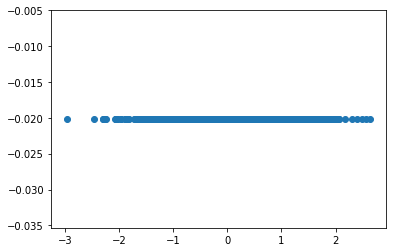

In [23]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)
svr_rbf.fit(X_train,y_train)
svr_rbf_prediction = svr_rbf.predict(X_test)
plt.scatter(y_test, svr_rbf_prediction)

In [24]:
r2_score(y_test, svr_rbf_prediction)

-1.567010841285743e-05

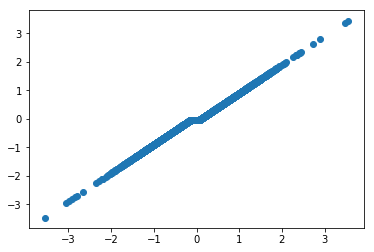

In [25]:
svr_rbf_prediction2 = svr_rbf.predict(X_train)
plt.scatter(y_train, svr_rbf_prediction2)

In [26]:
r2_score(y_train, svr_rbf_prediction2)

0.9903106732097021

# PCA SVR rbf kernel

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)
svr_rbf.fit(X_pca_train,y_train)
svr_rbf_prediction = svr_rbf.predict(X_pca_test)
plt.scatter(y_test, svr_rbf_prediction)

In [ ]:
r2_score(y_test, svr_rbf_prediction)

In [ ]:
svr_rbf_prediction2 = svr_rbf.predict(X_pca_train)
plt.scatter(y_train, svr_rbf_prediction2)

In [ ]:
r2_score(y_train, svr_rbf_prediction2)